# Hotel Booking Cancellation Prediction

# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)
from sklearn import metrics

## Data Overview

- Observations
- Sanity checks

In [2]:
hotel = pd.read_csv('INNHotelsGroup.csv') ##  Fill the blank to read the data

In [3]:
# copying data to another variable to avoid any changes to original data
data = hotel.copy()


In [4]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


In [5]:
data.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80000,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95000,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39000,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50000,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67000,0,Not_Canceled


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

Our data set consists of columns having : <b> float64(1), int64(13), object(5)<b>

In [7]:
print(f'We have a total of {data.shape[1]} columns')
print(f'and a total of {data.shape[0]} rows. ')

We have a total of 19 columns
and a total of 36275 rows. 


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.00000,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
required_car_parking_space,36275.00000,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
lead_time,36275.00000,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000
arrival_month,36275.00000,7.42365,3.06989,1.00000,5.00000,8.00000,10.00000,12.00000
arrival_date,36275.00000,15.59700,8.74045,1.00000,8.00000,16.00000,23.00000,31.00000
repeated_guest,36275.00000,0.02564,0.15805,0.00000,0.00000,0.00000,0.00000,1.00000


- The average number of adults is 2 with the max being 4 
- The max number of childrens is 10 
- The avg_price_per_room is 103.42354	

In [9]:
data.drop(columns = 'Booking_ID',axis=1,  inplace = True ) # lets drop our bookid columns since it brings no value to the dataset

In [10]:
data.isna().sum()# checking for missing values 

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

No missing values in our dataset

In [11]:
duplicateRows = data[data.duplicated()]
duplicateRows 


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
20,2,0,2,2,Meal Plan 1,0,Room_Type 1,99,2017,10,30,Online,0,0,0,65.00000,0,Canceled
154,2,0,0,1,Meal Plan 2,0,Room_Type 1,55,2018,4,6,Offline,0,0,0,104.00000,0,Not_Canceled
272,2,0,1,2,Meal Plan 2,0,Room_Type 1,161,2018,3,25,Online,0,0,0,130.00000,0,Canceled
301,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Online,0,0,0,130.00000,0,Canceled
319,2,0,0,2,Meal Plan 2,0,Room_Type 1,320,2018,8,18,Online,0,0,0,115.00000,1,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36261,1,0,2,4,Meal Plan 1,0,Room_Type 1,245,2018,7,6,Offline,0,0,0,110.00000,0,Canceled
36263,1,0,2,1,Meal Plan 1,0,Room_Type 1,116,2018,2,28,Online,0,0,0,1.00000,0,Not_Canceled
36267,2,0,1,0,Not Selected,0,Room_Type 1,49,2018,7,11,Online,0,0,0,93.15000,0,Canceled
36268,1,0,0,3,Meal Plan 1,0,Room_Type 1,166,2018,11,1,Offline,0,0,0,110.00000,0,Canceled


We can see that we have huge amount of rows with duplicate vaules 

In [12]:
data.drop_duplicates(inplace = True) # dropping duplicated values 

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

In [13]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [14]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
    plt.title(feature.capitalize())

    plt.show()  # show the plot

In [15]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [16]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

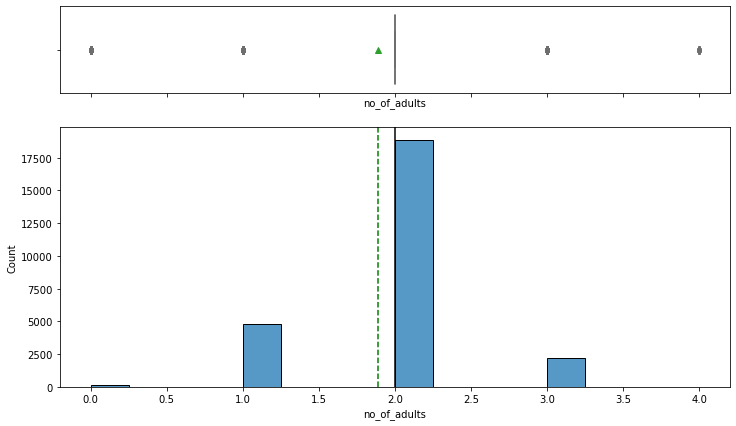

In [17]:
histogram_boxplot(data,'no_of_adults' )

We can see that the number of adults ranges from 0 - 4 with the average being 2 adults 

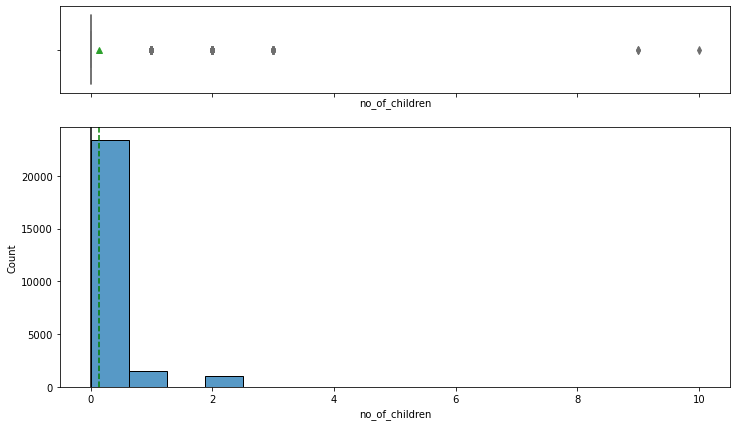

In [18]:
histogram_boxplot(data, 'no_of_children')

The average number of childrens have been 0 

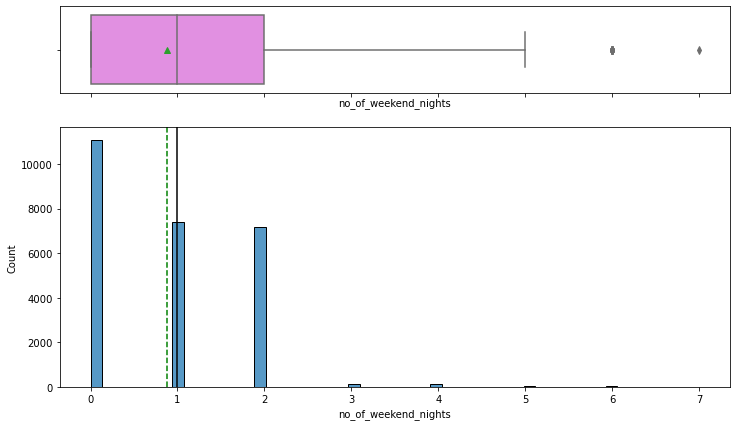

In [19]:
histogram_boxplot(data, 'no_of_weekend_nights')

We can see that  the number of weekends have been mostly from 0-2 

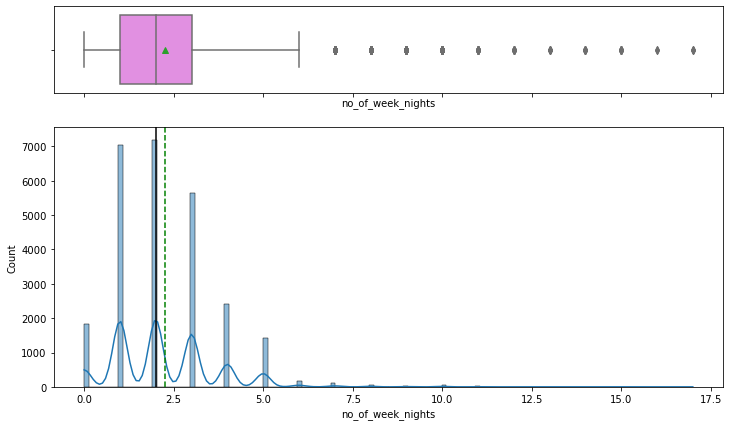

In [20]:
histogram_boxplot(data, 'no_of_week_nights', kde = True )

 We can see that the number week nights range from 0 - 17

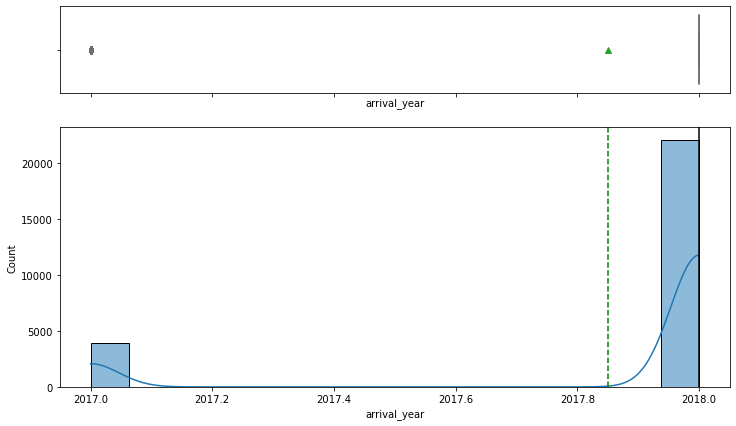

In [21]:
histogram_boxplot(data, 'arrival_year', kde = True )

We can see that we have more entries in year 2018 versus 2017

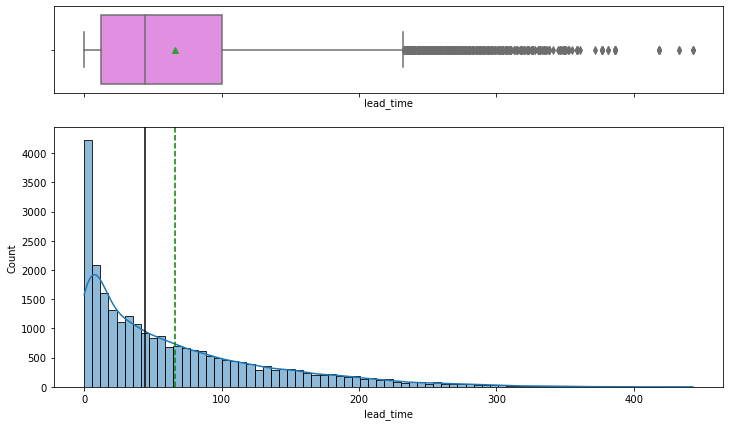

In [22]:
histogram_boxplot(data, 'lead_time', kde = True )

Lead time refer number of days between the date of booking and the arrival date which we can see that we have some people booking there  trips 400 days out 

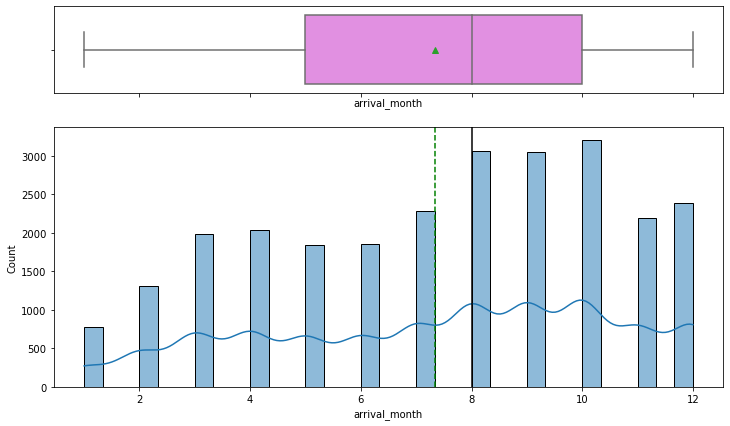

In [23]:
# 1. What are the busiest months in the hotel?
histogram_boxplot(data, 'arrival_month', kde = True )

The count increases later in the year in months Sept - Dec 

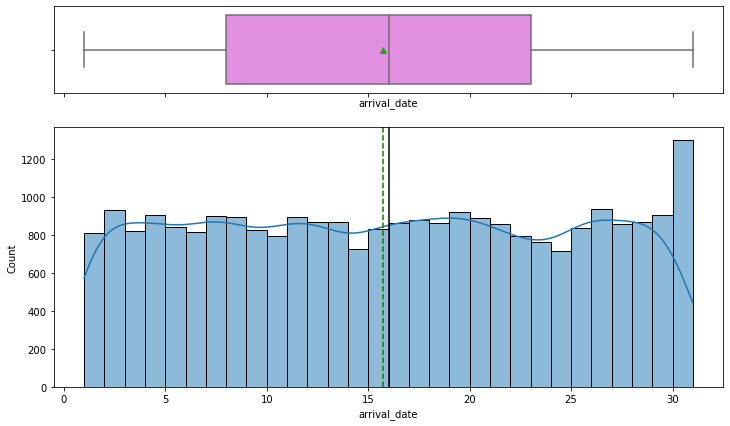

In [24]:
histogram_boxplot(data, 'arrival_date', kde = True )

Our arrival date seems to be constant throughout each days 

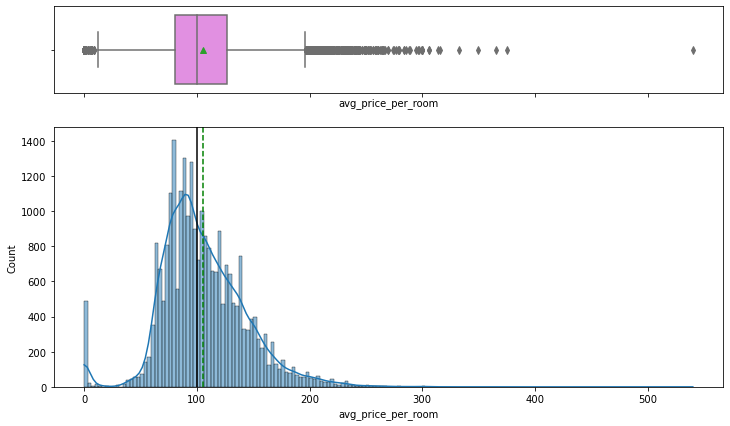

In [25]:
histogram_boxplot(data, 'avg_price_per_room', kde = True )

The prices mostly lay around our 100$ but go as far as 500

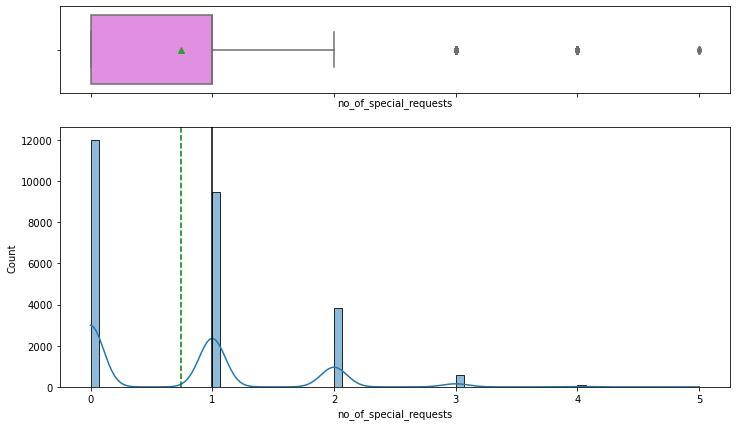

In [26]:
histogram_boxplot(data, 'no_of_special_requests', kde = True )

The number of special request ranges from 0-5 request with most of them being zero 

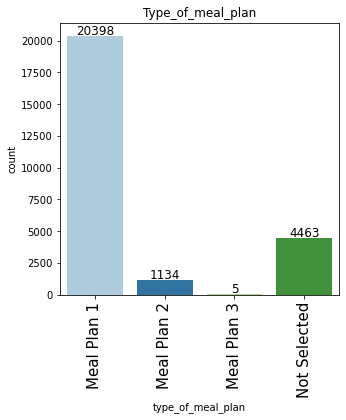

In [27]:
labeled_barplot(data, 'type_of_meal_plan')

We can see that Meal 1 was chosen more over other plans 

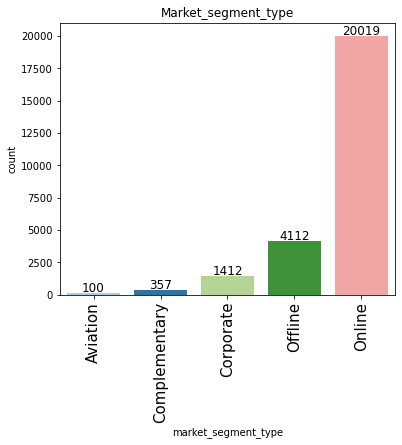

In [28]:
#2. Which market segment do most of the guests come from?
labeled_barplot(data, 'market_segment_type')

Market segment online designation was chosen over any other with 20019

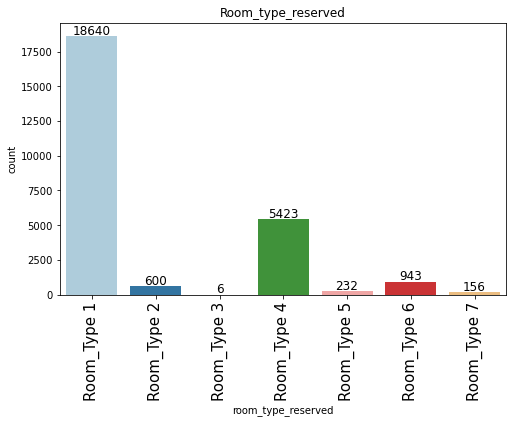

In [29]:
labeled_barplot(data, 'room_type_reserved')

Room Type 1 was preferably chosen with Room Type 4 choosen second 

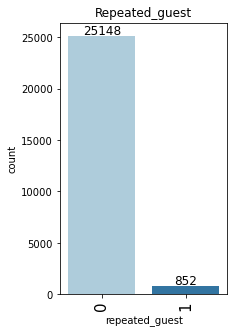

In [30]:
labeled_barplot(data, 'repeated_guest')

We can see that our guest arent coming back. (0 - No, 1- Yes)

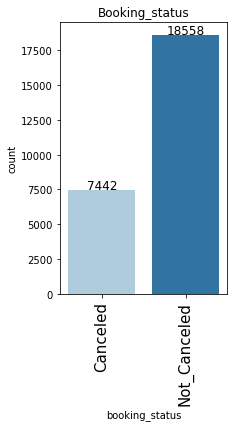

In [31]:
labeled_barplot(data, 'booking_status')

We can see we can have an imbalanced dataset with less people not Canceling in our dataset 

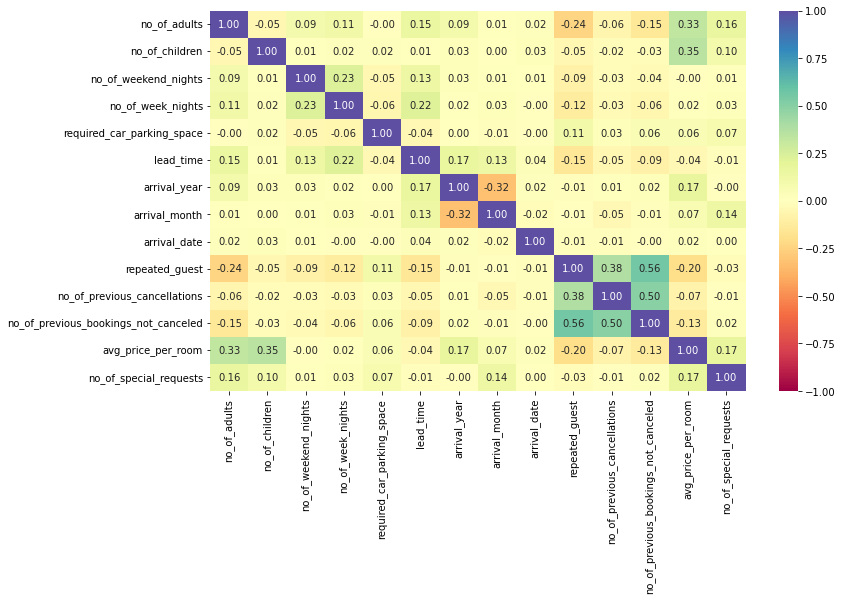

In [32]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

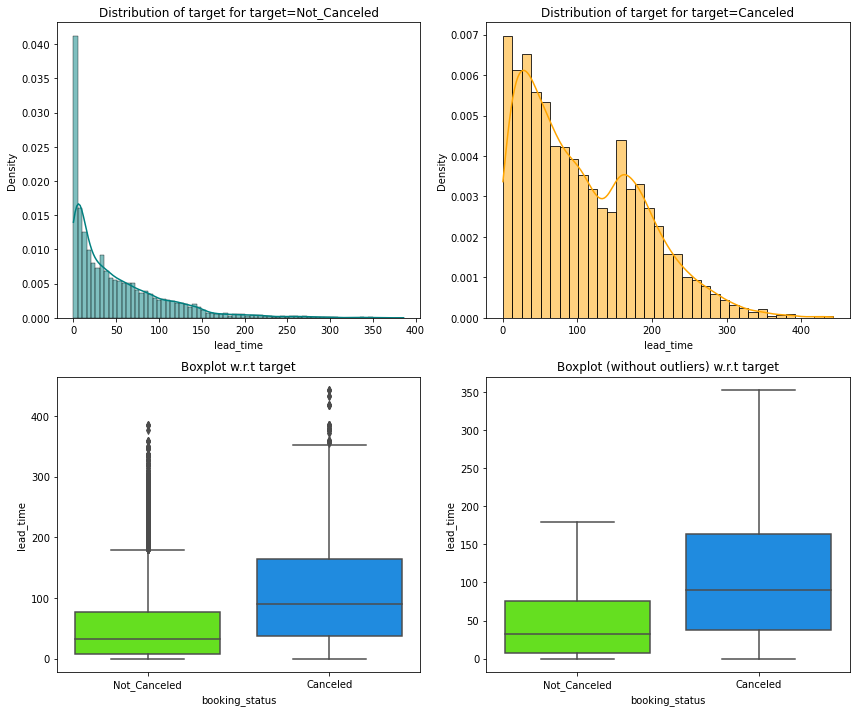

In [32]:
distribution_plot_wrt_target(data,'lead_time', 'booking_status' )

We can see that our lead time have a wider range in our canceled status. People are more prone to cancel with a longer lead time. 

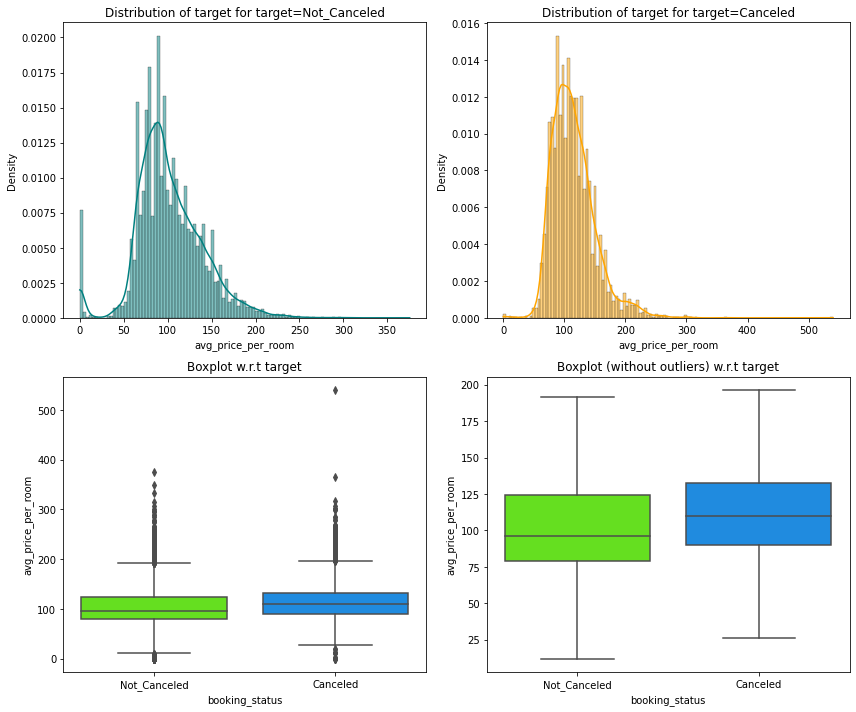

In [33]:
distribution_plot_wrt_target(data,'avg_price_per_room', 'booking_status' )

Our Average price in our cancel column is higher. People are more prone to cancel there booking if its more expensive. 

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

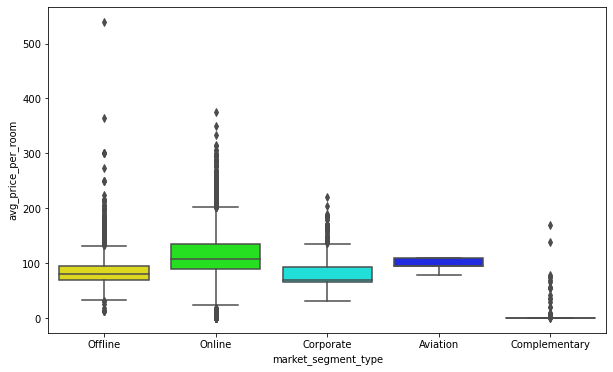

In [34]:
#3. Hotel rates are dynamic and change according to demand and customer demographics. 
#What are the differences in room prices in different market segments?

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data, x="market_segment_type", y="avg_price_per_room", palette="hsv"
)
plt.show()


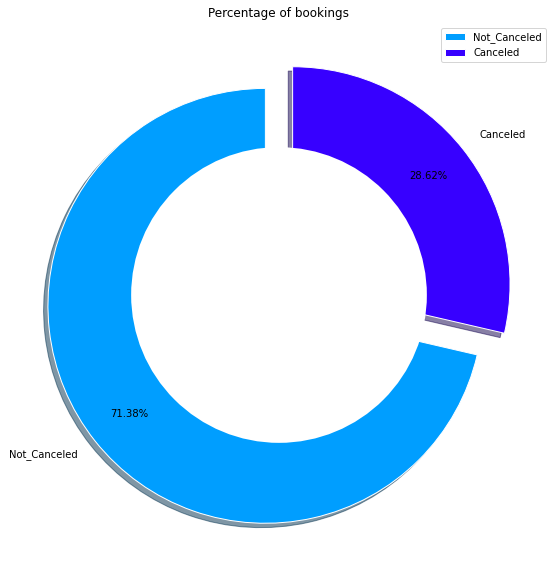

In [35]:
# 4. What percentage of bookings are canceled? 
colors = sns.color_palette("hsv")[3:5]
labels = data.booking_status.unique()
plt.figure(figsize= (10,10))
plt.pie(data.booking_status.value_counts(),
        labels = labels, 
        colors=colors, 
        autopct= '%.2f%%', 
        shadow= True, 
        explode = [.08, .08],
        startangle=90,
        wedgeprops={'edgecolor': 'white'},
        pctdistance=0.8
        )
centre_circle = plt.Circle((0,0),0.68,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('percentage of bookings'.capitalize())
plt.legend()
plt.show()

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                 7442         18558  26000
0                   7433         17715  25148
1                      9           843    852
------------------------------------------------------------------------------------------------------------------------


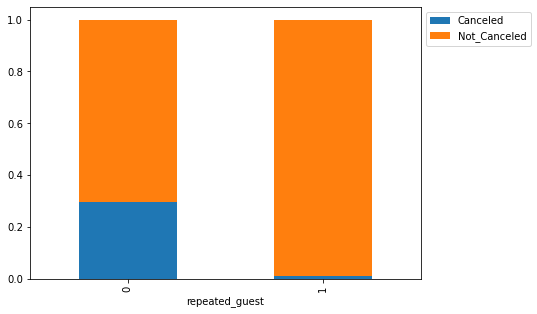

In [36]:
#Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
stacked_barplot(data, 'repeated_guest','booking_status')

We can see that we have more repeated guest in our not canceled column 

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                         7442         18558  26000
0                           4919          7082  12001
1                           1992          7480   9472
2                            531          3316   3847
3                              0           601    601
4                              0            73     73
5                              0             6      6
------------------------------------------------------------------------------------------------------------------------


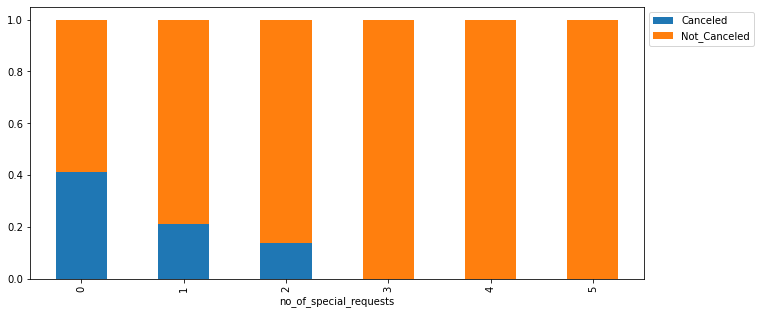

In [37]:
#Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?
stacked_barplot(data, "no_of_special_requests", 'booking_status')
plt.show()

Poeple with less request were more prone to cancel 

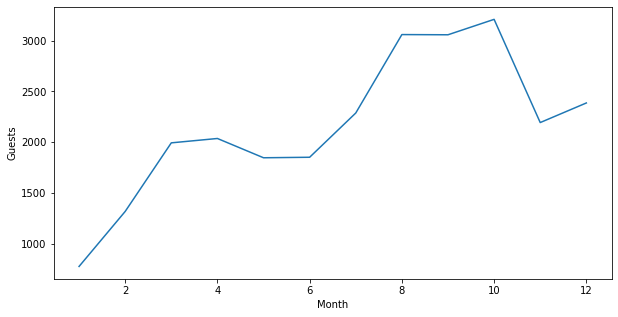

In [33]:
# Let's find out what are the busiest months in the hotel
# grouping the data on arrival months and extracting the count of bookings
monthly_data = data.groupby(["arrival_month"])["booking_status"].count()

# creating a dataframe with months and count of customers in each month
monthly_data = pd.DataFrame(
    {"Month": list(monthly_data.index), "Guests": list(monthly_data.values)}
)

# plotting the trend over different months
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_data, x="Month", y="Guests")
plt.show()

- The trend shows the number of bookings remains consistent from April to July and the hotel sees around 3000 to 3500 guests.
- Most bookings were made in October - more than 5000 bookings.
- Least bookings were made in January - around 1000 bookings.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

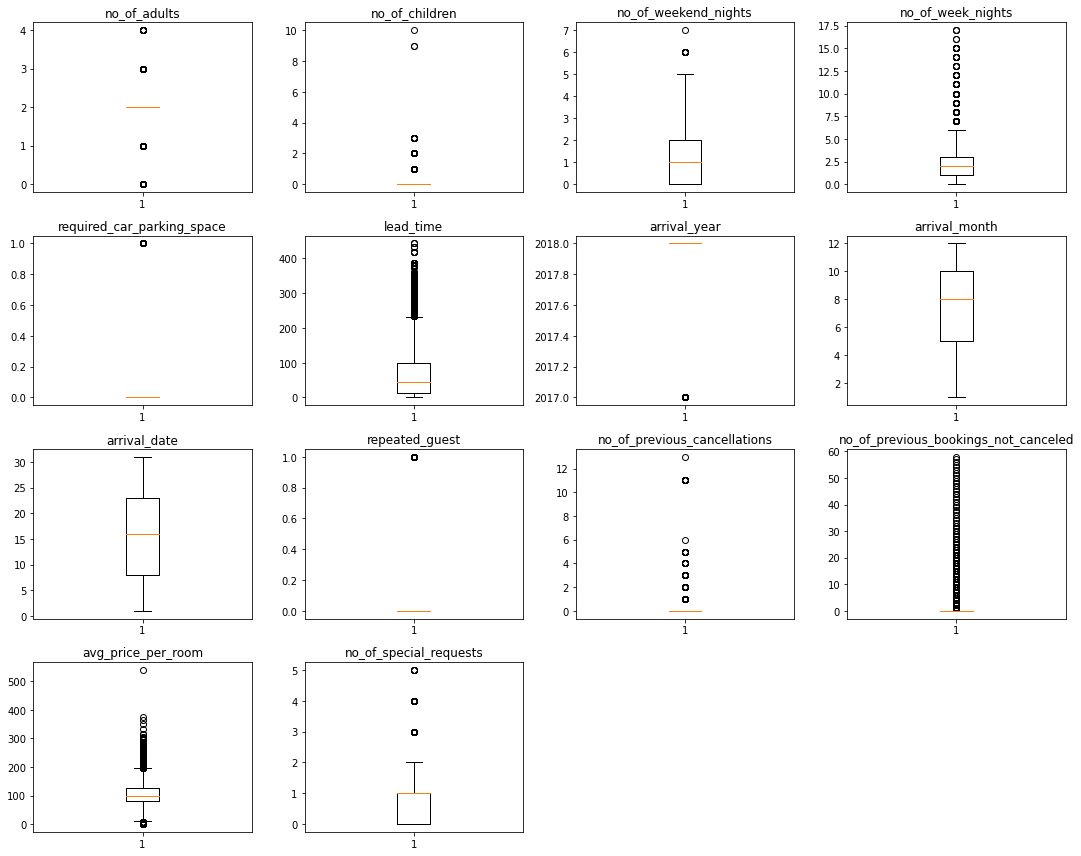

In [34]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# dropping booking_status


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

# Data Preparation for modeling

In [35]:
#  Changing str values in our target variable to numbers, 0: Not Canceled and 1 Canceled 
data['booking_status'] = data.booking_status.apply(lambda x: 0 if x == 'Not_Canceled' else 1 )

data.head()
df = data.copy() # will use for later 

In [36]:
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

# adding constant
X = sm.add_constant(X)

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30 ,stratify= Y, random_state= 123)

In [42]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (18200, 28)
Shape of test set :  (7800, 28)
Percentage of classes in training set:
0   0.71379
1   0.28621
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.71372
1   0.28628
Name: booking_status, dtype: float64


In [38]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                18200
Model:                          Logit   Df Residuals:                    18172
Method:                           MLE   Df Model:                           27
Date:                Sat, 03 Dec 2022   Pseudo R-squ.:                  0.3167
Time:                        15:39:59   Log-Likelihood:                -7445.6
converged:                      False   LL-Null:                       -10897.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -672.2895    156.472     -4.297      0.000    -978.969    -365.609
no_of_adults                            -0.0082      

# Model evaluation criterion
Model can make wrong predictions as:
1. Predicting a customer will not cancel their booking but in reality, the customer will cancel their booking.
2. Predicting a customer will cancel their booking but in reality, the customer will not cancel their booking.

# Which case is more important?
Both the cases are important as:

If we predict that a booking will not be canceled and the booking gets canceled then the hotel will lose resources and will have to bear additional costs of distribution channels.

If we predict that a booking will get canceled and the booking doesn't get canceled the hotel might not be able to provide satisfactory services to the customer by assuming that this booking will be canceled. This might damage the brand equity.

How to reduce the losses?
Hotel would want F1 Score to be maximized, greater the F1 score higher are the chances of minimizing False Negatives and False Positives.

In [39]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [40]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

# Observations

- Negative values of the coefficient show that the probability of customers canceling the booking decreases with the increase of the corresponding attribute value.

- Positive values of the coefficient show that the probability of customer canceling increases with the increase of corresponding attribute value.

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

- But these variables might contain multicollinearity, which will affect the p-values.

- We will have to remove multicollinearity from the data to get reliable coefficients and p-values.

- There are different ways of detecting (or testing) multi-collinearity, one such way is the Variation Inflation Factor

In [41]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.81209,0.56575,0.71790,0.63281


In [42]:
# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [43]:
checking_vif(X_train)

,feature,VIF
0,const,42082664.34765
1,no_of_adults,1.42418
2,no_of_children,2.02957
3,no_of_weekend_nights,1.08406
4,no_of_week_nights,1.13233
5,required_car_parking_space,1.03662
6,lead_time,1.29441
7,arrival_year,1.31278
8,arrival_month,1.25691
9,arrival_date,1.00486


# Observations

- None of the numerical variables show moderate or high multicollinearity.
- We will ignore the VIF for the dummy variables

# Dropping high p-value variables
- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
- Build a model, check the p-values of the variables, and drop the column with the highest p-value.
- Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
- Repeat the above two steps till there are no columns with p-value > 0.05.

In [44]:
# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Offline', 'market_segment_type_Online']


In [45]:
X_train1 = X_train[selected_features]
X_test1 = X_test[selected_features]

In [46]:
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(disp=False)
print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                18200
Model:                          Logit   Df Residuals:                    18181
Method:                           MLE   Df Model:                           18
Date:                Sat, 03 Dec 2022   Pseudo R-squ.:                  0.3154
Time:                        15:44:28   Log-Likelihood:                -7459.9
converged:                       True   LL-Null:                       -10897.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -659.9918    155.399     -4.247      0.000    -964.569    -355.415
no_of_children                     0.1889      0.059      3.200      0.

In [47]:
print("Training performance:")
model_performance_classification_statsmodels(lg1, X_train1, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.81176,0.56479,0.71739,0.63201


# All the variables left have p-value<0.05.
- So we can say that lg1 is the best model for making any inference.
- The performance on the training data is the same as before dropping the variables with the high p-value.

# Coefficient interpretations
- Coefficients of required_car_parking_space, arrival_month, repeated_guest, no_of_special_requests and some others are negative, an increase in these will lead to a decrease in chances of a customer canceling their booking.
- Coefficients of  no_of_children, no_of_weekend_nights, no_of_week_nights, lead_time, avg_price_per_room, type_of_meal_plan_Not Selected and some others are positive, an increase in these will lead to a increase in the chances of a customer canceling their booking.

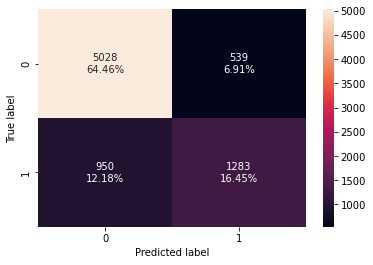

In [48]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test)

In [49]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg1, X_test1, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80910,0.57456,0.70417,0.63280


# Converting coefficients to odds
- The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients.
- Therefore, odds = exp(b)
- The percentage change in odds is given as odds = (exp(b) - 1) * 100

In [52]:
# converting coefficients to odds
odds = np.exp(lg1.params)

# finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns).T

,const,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Offline,market_segment_type_Online
Odds,0.00000,1.20797,1.09338,1.09125,0.21124,1.01600,1.38456,0.96918,0.09479,1.01669,0.23409,1.29114,0.66635,0.89018,0.46432,0.42939,0.29858,0.20180,2.09612
Change_odd%,-100.00000,20.79677,9.33759,9.12511,-78.87570,1.59993,38.45642,-3.08245,-90.52065,1.66928,-76.59054,29.11398,-33.36538,-10.98214,-53.56751,-57.06077,-70.14233,-79.82024,109.61222


# Coefficient interpretations

- no_of_children: Holding all other features constant a 1 unit change in the number of children will increase the odds of a booking getting cancelled by 1.20797 times or a 20.79677% increase in the odds of a booking getting cancelled.

- no_of_weekend_nights: Holding all other features constant a 1 unit change in the number of weeknights a customer stays at the hotel will increase the odds of a booking getting cancelled by 1.09338 times or a 9.33759% increase in the odds of a booking getting cancelled.

- no_of_week_nights: Holding all other features constant a 1 unit change in the number of weeknights a customer stays at the hotel will increase the odds of a booking getting cancelled by 1.09125 times or a 9.12511% increase in the odds of a booking getting cancelled.

- required_car_parking_space: The odds of a customer who requires a car parking space are0.21124 times less than a customer who doesn't require a car parking space or a 78.87570% fewer odds of a customer canceling their booking.

- lead_time: Holding all other features constant a 1 unit change in the lead time will increase the odds of a booking getting cancelled by 1.01600 times or a 1.59993 increase in the odds of a booking getting cancelled.

- no_of_special_requests: Holding all other features constant a 1 unit change in the number of special requests made by the customer will decrease the odds of a booking getting cancelled by 0.23409 times or a 76.59054% decrease in the odds of a booking getting cancelled.

- avg_price_per_room: Holding all other features constant a 1 unit change in the lead time will increase the odds of a booking getting cancelled by 1.01669 times or a 1.66928% increase in the odds of a booking getting cancelled.


### Interpretation for other attributes can be done similarly.

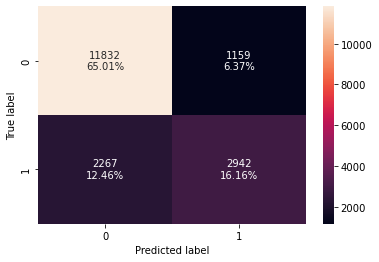

In [53]:
#Checking model performance on the training set , creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train)

In [54]:
print("Training performance:")
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg1, X_train1, y_train
)
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.81176,0.56479,0.71739,0.63201


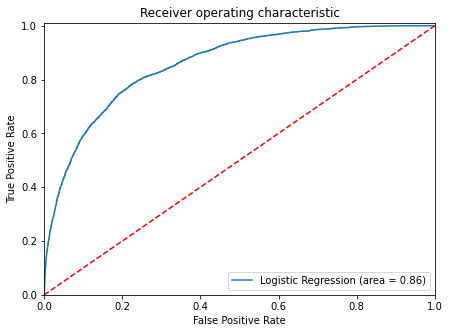

In [55]:
#ROC-AUC
#ROC-AUC on training set

logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train1))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

Logistic Regression model is giving a generalized performance on training and test set.
ROC-AUC score of 0.86 on training is quite good

### Model Performance Improvement
- Let's see if the recall score can be improved further, by changing the model threshold using AUC-ROC Curve.

In [56]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.2894886865700436


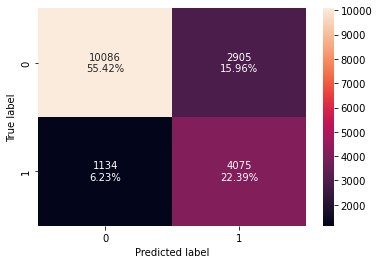

In [57]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)

In [58]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.77808,0.78230,0.58381,0.66864


 Recall has increased significantly as compared to the previous model.
As we will decrease the threshold value, Recall will keep on increasing and the Precision will decrease, but this is not right, we need to choose an optimal balance between recall and precision.

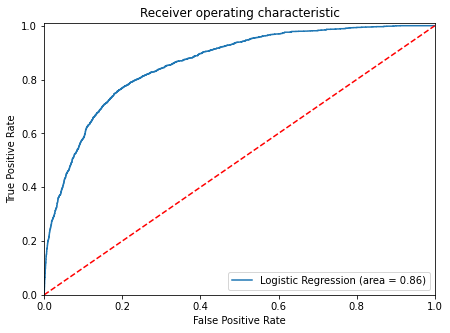

In [59]:
#Let's check the performance on the test set
logit_roc_auc_train = roc_auc_score(y_test, lg1.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(X_test1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

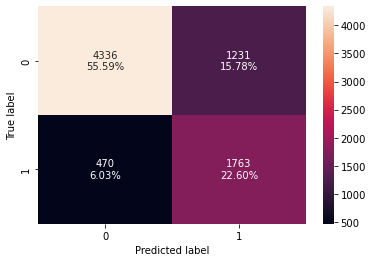

In [60]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc)

In [61]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.78192,0.78952,0.58884,0.67457


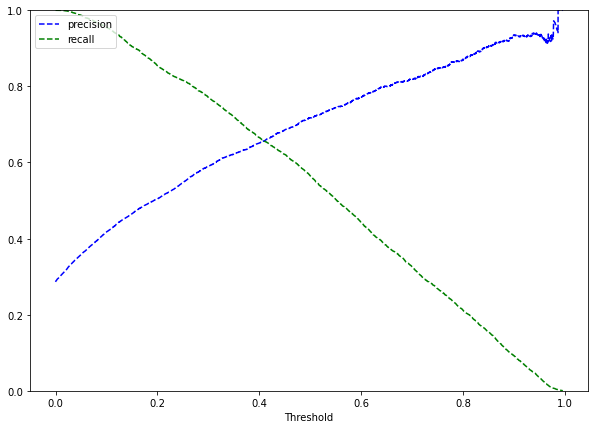

In [62]:
y_scores = lg1.predict(X_train1)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

At 0.42 threshold we get a balanced precision and recall.

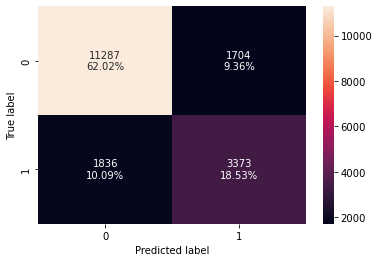

In [63]:
# setting the threshold
optimal_threshold_curve = 0.42
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train, threshold=optimal_threshold_curve)

In [64]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80549,0.64753,0.66437,0.65584


Model performance has improved as compared to our initial model.
Model has given a balanced performance in terms of precision and recall.

In [65]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.81167,0.66682,0.67254,0.66966


In [66]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold,Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.81176,0.77808,0.80549
Recall,0.56479,0.78230,0.64753
Precision,0.71739,0.58381,0.66437
F1,0.63201,0.66864,0.65584


In [67]:
# test performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Logistic Regression-default Threshold,Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80910,0.78192,0.81167
Recall,0.57456,0.78952,0.66682
Precision,0.70417,0.58884,0.67254
F1,0.63280,0.67457,0.66966


# Oservations from Logistic Regression model
We have been able to build a predictive model that can be used by the hotel to predict which bookings are likely to be cancelled with an F1 score of 0.6 on the training set and formulate marketing policies accordingly.

The logistic regression models are giving a generalized performance on training and test set.

Using the model with default threshold the model will give a low recall but good precision score - The hotel will be able to predict which bookings will not be cancelled and will be able to provide satisfactory services to those customers which help in maintaining the brand equity but will lose on resources.

Using the model with a 0.37 threshold the model will give a high recall but low precision score - The hotel will be able to save resources by correctly predicting the bookings which are likely to be cancelled but might damage the brand equity.

Using the model with a 0.42 threshold the model will give a balance recall and precision score - The hotel will be able to maintain a balance between resources and brand equity.

Coefficients of required_car_parking_space, arrival_month, repeated_guest, no_of_special_requests and some others are negative, an increase in these will lead to a decrease in chances of a customer canceling their booking.

Coefficients of  no_of_children, no_of_weekend_nights, no_of_week_nights, lead_time, avg_price_per_room, type_of_meal_plan_Not Selected and some others are positive, an increase in these will lead to a increase in the chances of a customer canceling their booking.

# Decision Tree

In [68]:
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [69]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (18200, 27)
Shape of test set :  (7800, 27)
Percentage of classes in training set:
0   0.71165
1   0.28835
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.71872
1   0.28128
Name: booking_status, dtype: float64


In [70]:
# Building Decision Tree Model
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
- The model_performance_classification_sklearn function will be used to check the model performance of models.
- The confusion_matrix_sklearnfunction will be used to plot the confusion matrix.

In [71]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [73]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

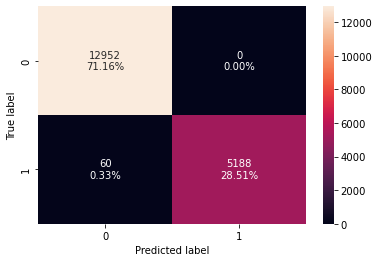

In [74]:
#Checking model performance on training set
confusion_matrix_sklearn(model, X_train, y_train)

In [75]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.99670,0.98857,1.00000,0.99425


- Almost 0 errors on the training set, each sample has been classified correctly.
- Model has performed very well on the training set.
- As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
- Let's check the performance on test data to see if the model is overfitting.

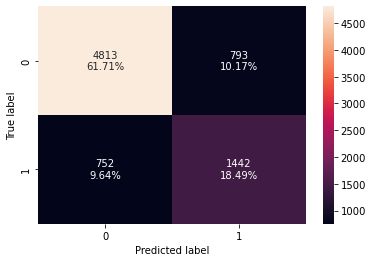

In [76]:
#Checking model performance on testset

confusion_matrix_sklearn(model, X_test, y_test)

In [77]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.80192,0.65725,0.64519,0.65116


The decision tree model is overfitting the data as expected and not able to generalize well on the test set.
We will have to prune the decision tree.

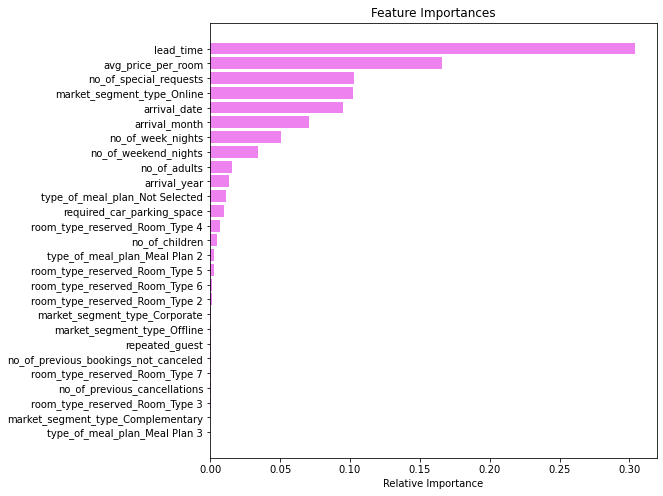

In [78]:
# let's check the important features.
feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Lead time is the most important feature followed by average price per room.

## Pruning the tree

In [79]:
#pre prunning 
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=75,
                       min_samples_split=10, random_state=1)

,Accuracy,Recall,Precision,F1
0,0.84231,0.72923,0.72536,0.72729


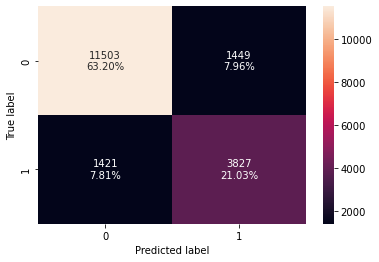

In [80]:
confusion_matrix_sklearn(estimator, X_train, y_train)
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

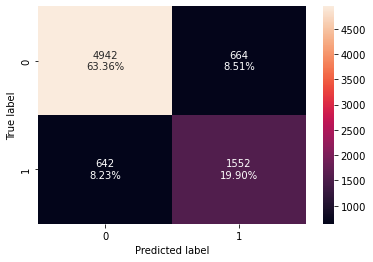

In [81]:
#Checking performance on the test set
confusion_matrix_sklearn(estimator, X_test, y_test)

In [82]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.83256,0.70738,0.70036,0.70385


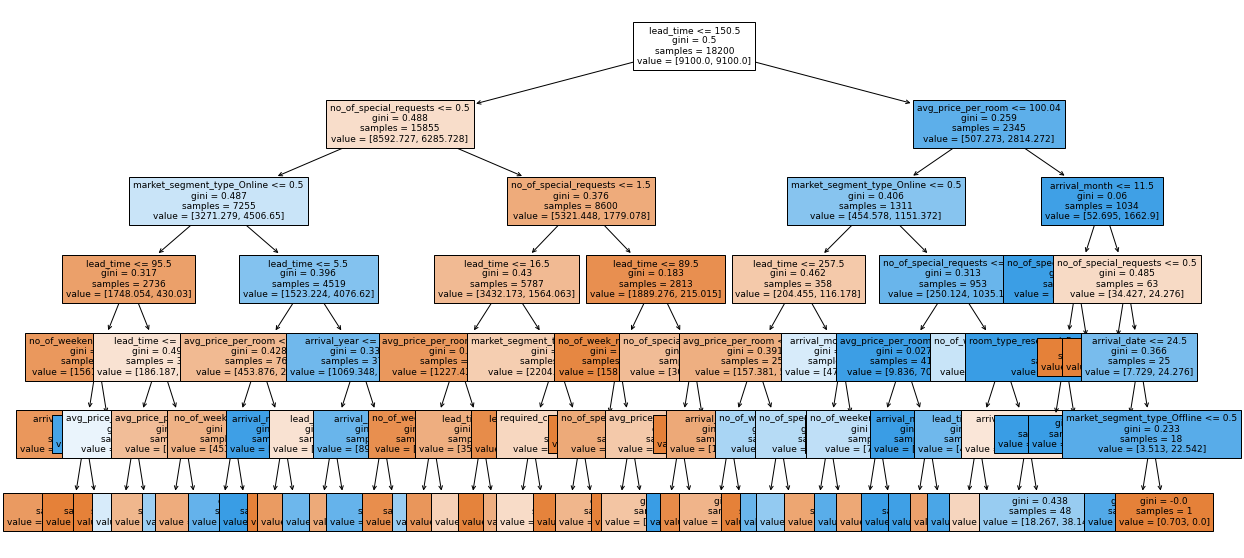

In [83]:
#Visualizing the Decision Tree
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [84]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 150.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 95.50
|   |   |   |   |--- no_of_weekend_nights <= 3.50
|   |   |   |   |   |--- arrival_month <= 11.50
|   |   |   |   |   |   |--- weights: [1377.79, 275.71] class: 0
|   |   |   |   |   |--- arrival_month >  11.50
|   |   |   |   |   |   |--- weights: [183.38, 0.00] class: 0
|   |   |   |   |--- no_of_weekend_nights >  3.50
|   |   |   |   |   |--- weights: [0.70, 10.40] class: 1
|   |   |   |--- lead_time >  95.50
|   |   |   |   |--- lead_time <= 116.50
|   |   |   |   |   |--- avg_price_per_room <= 58.75
|   |   |   |   |   |   |--- weights: [9.13, 0.00] class: 0
|   |   |   |   |   |--- avg_price_per_room >  58.75
|   |   |   |   |   |   |--- weights: [75.88, 95.37] class: 1
|   |   |   |   |--- lead_time >  116.50
|   |   |   |   |   |--- avg_price_per_room <= 119.50
|   |   |   |   |   |   |--- weights: [97.66, 41.62] class: 0
|   |   |

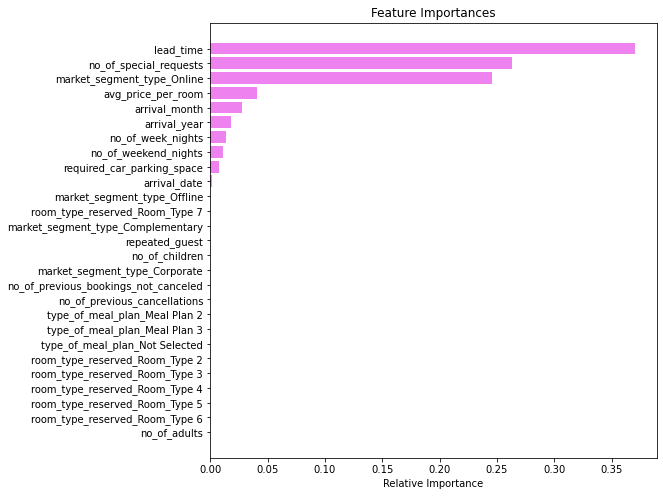

In [85]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Observations from decision tree
- We can see that the tree has become simpler and the rules of the trees are readable.
- The model performance of the model has been generalized.
- We observe that the most important features are:
-Lead Time
-Market Segment - Online
-Number of special requests
-Average price per room

### The rules obtained from the decision tree can be interpreted as:

- The rules show that lead time plays a key role in identifying if a booking will be cancelled or not. 151 days has been considered as a threshold value by the model to make the first split.
### Bookings made more than 151 days before the date of arrival:

- If the average price per room is greater than 100 euros and the arrival month is December, then the the booking is less likely to be cancelled.
- If the average price per room is less than or equal to 100 euros and the number of special request is 0, then the booking is likely to get canceled.

### Bookings made under 151 days before the date of arrival:

- If a customer has at least 1 special request the booking is less likely to be cancelled.
- If the customer didn't make any special requests and the booking was done Online it is more likely to get canceled, if the booking was not done online, it is less likely to be canceled.


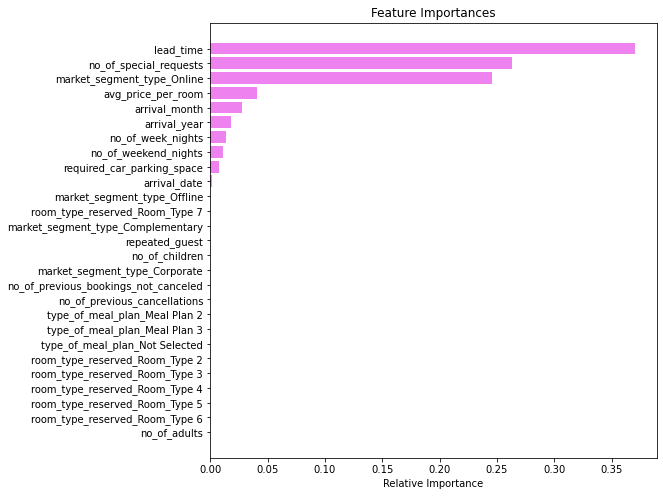

In [87]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Observations from decision tree
-We can see that the tree has become simpler and the rules of the trees are readable.
-The model performance of the model has been generalized.
-We observe that the most important features are:
-Lead Time
-Market Segment - Online
-Number of special requests
-Average price per room
### The rules obtained from the decision tree can be interpreted as:

-The rules show that lead time plays a key role in identifying if a booking will be cancelled or not. 151 days has been considered as a threshold value by the model to make the first split.
### Bookings made more than 151 days before the date of arrival:

-If the average price per room is greater than 100 euros and the arrival month is December, then the the booking is less likely to be cancelled.
-If the average price per room is less than or equal to 100 euros and the number of special request is 0, then the booking is likely to get canceled.
### Bookings made under 151 days before the date of arrival:

- If a customer has at least 1 special request the booking is less likely to be cancelled.
-If the customer didn't make any special requests and the booking was done Online it is more likely to get canceled, if the booking was not done online, it is less likely to be canceled.--

In [89]:
#Cost Complexity Pruning
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [90]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00330
1,0.00000,0.00330
2,0.00000,0.00330
3,0.00000,0.00330
4,0.00000,0.00330
...,...,...
1594,0.00580,0.33202
1595,0.00724,0.33925
1596,0.01428,0.35353
1597,0.04631,0.44615


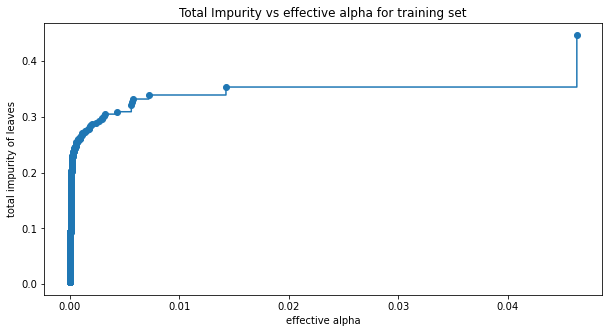

In [91]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

 Next, we train a decision tree using effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [92]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.05384766369115007


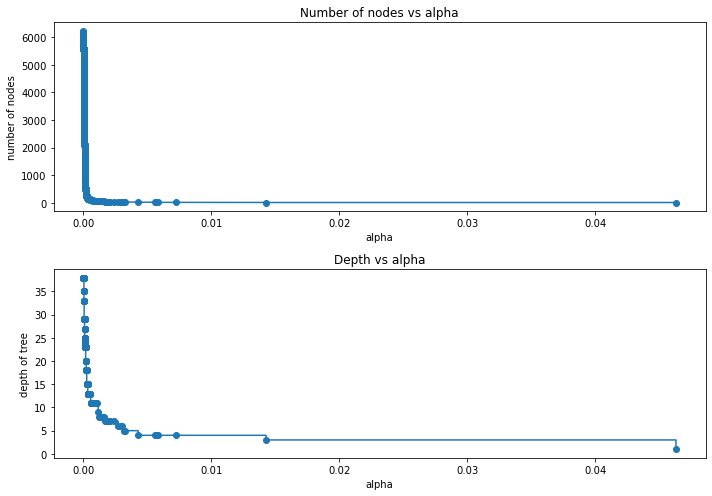

In [93]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [94]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

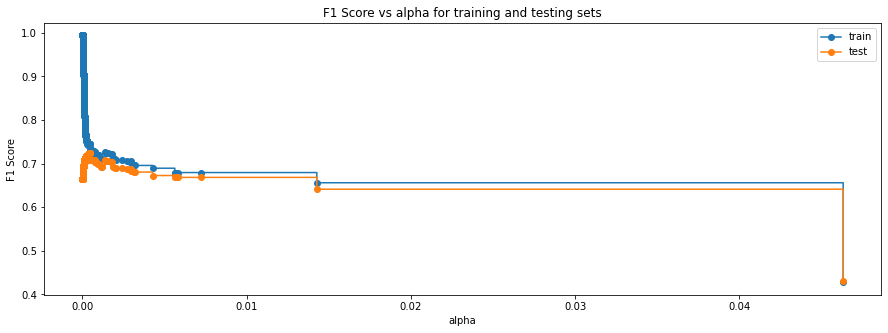

In [95]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [96]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0004727921622061579, class_weight='balanced',
                       random_state=1)


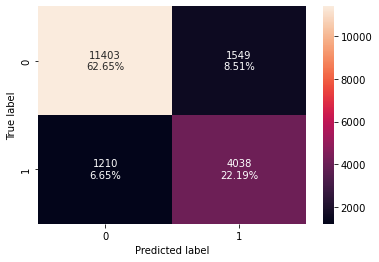

In [97]:
#Checking performance on training set
confusion_matrix_sklearn(best_model, X_train, y_train)

In [98]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.84841,0.76944,0.72275,0.74536


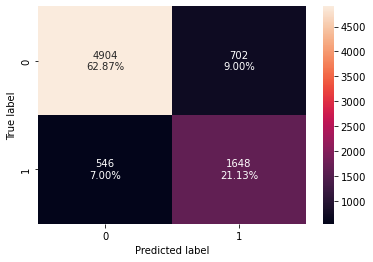

In [100]:
#Checking performance on test set
confusion_matrix_sklearn(best_model, X_test, y_test)

In [101]:
decision_tree_post_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_test

,Accuracy,Recall,Precision,F1
0,0.84000,0.75114,0.70128,0.72535


### Observations

-After post pruning the decision tree the performance has generalized on training and test set.
-We are getting high recall with this model but difference between recall and precision has increased.

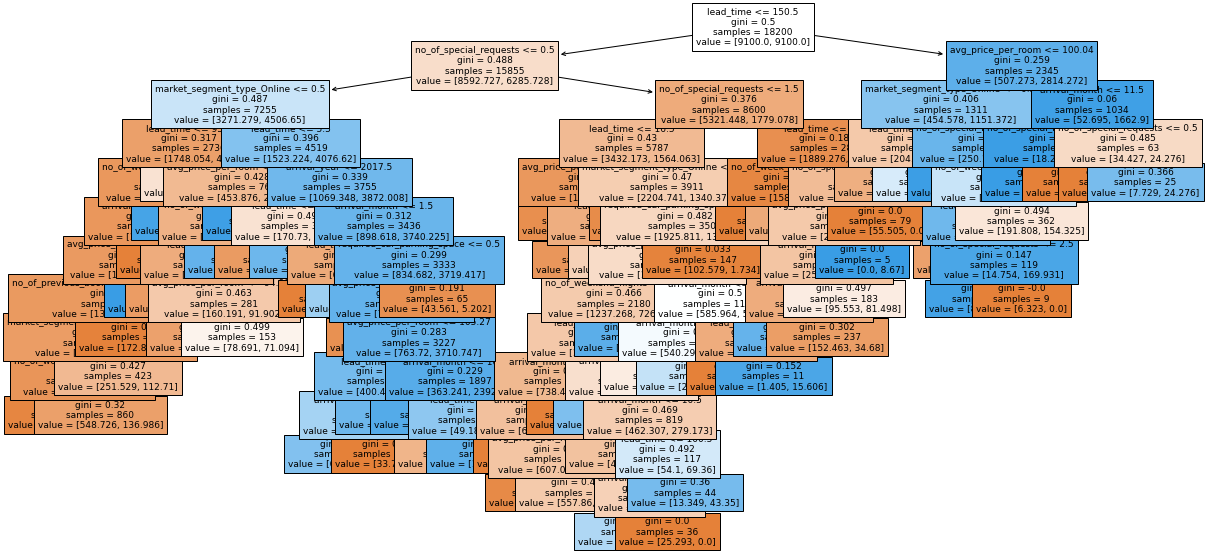

In [103]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [104]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 150.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 95.50
|   |   |   |   |--- no_of_weekend_nights <= 3.50
|   |   |   |   |   |--- arrival_month <= 11.50
|   |   |   |   |   |   |--- avg_price_per_room <= 201.50
|   |   |   |   |   |   |   |--- no_of_previous_bookings_not_canceled <= 0.50
|   |   |   |   |   |   |   |   |--- market_segment_type_Corporate <= 0.50
|   |   |   |   |   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [404.69, 17.34] class: 0
|   |   |   |   |   |   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [548.73, 136.99] class: 0
|   |   |   |   |   |   |   |   |--- market_segment_type_Corporate >  0.50
|   |   |   |   |   |   |   |   |   |--- weights: [251.53, 112.71] class: 0
|   |   |   |   |   |   |   |--- no_of_previous_bookings_not_canceled >  0.50
|   |   |   | 

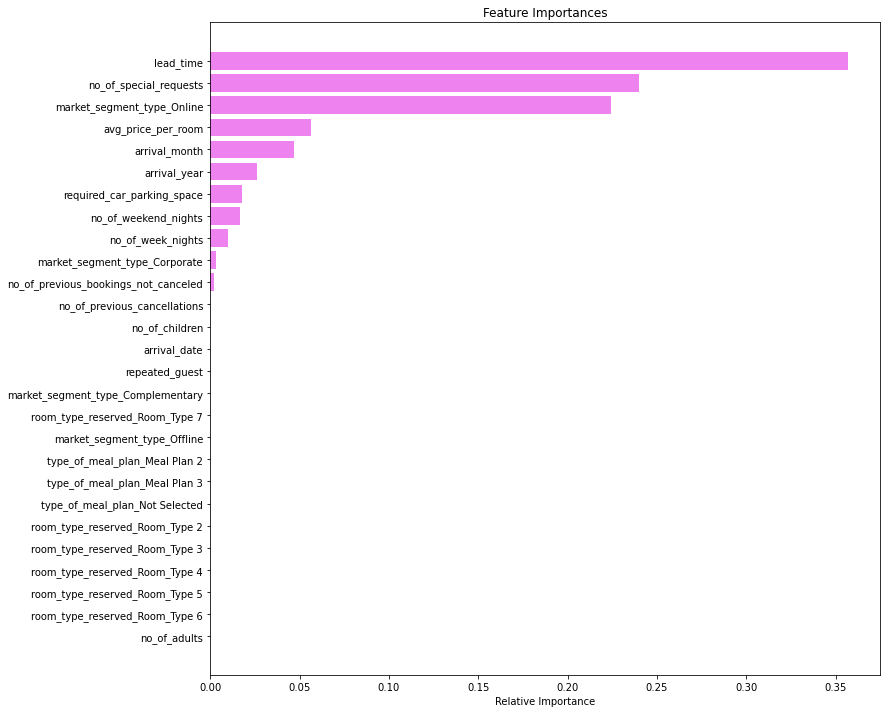

In [105]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [ ]:
# Observations from tree

- The tree is quite complex as complex as compared to the pre-pruned tree.
- The feature importance is same as we got in pre-pruned tree.

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_d

# Observations

- Decision tree model with default parameters is overfitting the training data and is not able to generalize well.
- Pre-pruned tree has given a generalized performance with balanced values of precision and recall.
- Post-pruned tree is giving a high F1 score as compared to other models but the difference between precision and recall is high.
- The hotel will be able to maintain a balance between resources and brand equity using the pre-pruned decision tree model.

# Insights
- Overall we can see that the Decision Tree model performs better on the dataset.
- Looking at important variables based on p-values in Logistic regression and feature importance in the Decision Tree model
- Lead Time, Number of special requests, Average price per room are important in both model
- From the Logistic Regression model we observe that Lead Time, and Average price per room have a positive relation with bookings getting canclled. And the number of special requests has negative relation with bookings getting cancelled.

### Business Recommendations
1. The lead time and the number of special requests made by the customer play a key role in identifying if a booking will be cancelled or not. Bookings where a customer has made a special request and the booking was done under 151 days to the date of arrival are less likely to be canceled.
- Using this information, the hotel can take the following actions:
= Set up a system that can send a prompt like an automated email to the customers before the arrival date asking for a re-confirmation of their booking and any changes they would like to make in their bookings.
-Remind guests about imminent deadlines.
The response given by the customer will give the hotel ample time to re-sell the room or make preparations for the customers' requests.

2. Stricter cancellation policies can be adopted by the hotel.
- The bookings where the average price per room is high, and there were special requests associated should not get a full refund as the loss of resources will be high in these cases.
- Ideally the cancellation policies should be consistent across all market segments but as noticed in our analysis high percentage of bookings done online are cancelled. The booking cancelled online should yield less percentage of refund to the customers.
- The refunds, cancellation fee, etc should be highlighted on the website/app before a customer confirms their booking to safeguard guests' interest.

3. The length of stay at the hotel can be restricted.
- We saw in our analysis that bookings, where the total length of stay was more than 5 days, had higher chances of getting cancelled.
- Hotel can allow bookings up to 5 days only and then customers should be asked to re-book if they wish to stay longer. These policies can be relaxed for corporate and Aviation market segments. For other market segments, the process should be fairly easy to not hamper their experience with the hotel.
- Such restrictions can be strategized by the hotel to generate additional revenue.

- In the months of December and January cancellation to non-cancellation ratio is low. Customers might travel to celebrate Christmas and New Year. The hotel should ensure that enough human resources are available to cater to the needs of the guests.
- October and September saw the highest number of bookings but also high number of cancellations. This should be investigated further by the hotel.
- Post-booking interactions can be initiated with the customers.

- Post-booking interactions will show the guests the level of attention and care they would receive at the hotel.
- To give guests a personalized experience, information about local events, nearby places to explore, etc can be shared from time to time.
- Improving the experience of repeated customers.

- Our analysis shows that there are very few repeated customers and the cancellation among them is very less which is a good indication as repeat customers are important for the hospitality industry as they can help in spreading the word of mouth.
- A loyal guest is usually more profitable for the business because they are more familiar with offerings from the hotel they have visited before.
- Attracting new customers is tedious and costs more as compared to a repeated guest.
- A loyalty program that offers - special discounts, access to services in hotels, etc for these customers can help in improving their experience.